In [62]:
# Cell 1: Import required libraries
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Activation, Concatenate
from tensorflow.keras.models import Model, load_model


In [94]:
# Cell 2: Load dataset and preprocess
data_path = '/content/pe-files-malwares/dataset_malwares.csv'  # Set the correct path to your dataset file
df = pd.read_csv(data_path)
df.drop(['Name'], axis=1, inplace=True)

# Compute correlation and select important features
correlation_matrix = df.corr()
target_correlation = correlation_matrix['Malware'].abs().sort_values(ascending=False)
important_features = [i for i in target_correlation.index if not pd.isna(target_correlation[i])]
filtered_df = df[important_features].drop("Malware",axis=1 )

# Normalize the features
scaler = MinMaxScaler()
normalized_ndarray= scaler.fit_transform(filtered_df)
normalized_df = pd.DataFrame(normalized_ndarray, columns=scaler.get_feature_names_out())


In [95]:
filtered_df.head()

,MajorSubsystemVersion,Subsystem,SectionMaxChar,Magic,Machine,SizeOfOptionalHeader,SizeOfStackReserve,TimeDateStamp,SuspiciousImportFunctions,SectionAlignment,...,ImageDirectoryEntryImport,BaseOfCode,e_ss,MinorSubsystemVersion,NumberOfRvaAndSizes,SectionMaxVirtual,SizeOfUninitializedData,ImageDirectoryEntryExport,ImageDirectoryEntrySecurity,SectionMaxPhysical
0,5,2,3758096608,523,34404,240,524288,1236512358,0,4096,...,54440,4096,0,2,16,270336,0,0,0,188416
1,5,2,3791650880,267,332,224,1048576,1365109591,0,4096,...,262276,4096,0,0,16,339968,0,0,346112,205680
2,4,2,3221225536,267,332,224,1048576,1438777028,0,4096,...,36864,256,0,0,528,45056,0,0,0,24065
3,4,2,3224371328,267,332,224,2097152,1354629311,14,4096,...,356352,4096,0,0,16,1003520,297472,0,14109472,638976
4,4,2,3227516992,267,332,224,2097152,1386631250,2,4096,...,61440,4096,0,0,16,73728,512,0,90624,42916


In [96]:
scaler.get_feature_names_out()

array(['MajorSubsystemVersion', 'Subsystem', 'SectionMaxChar', 'Magic',
       'Machine', 'SizeOfOptionalHeader', 'SizeOfStackReserve',
       'TimeDateStamp', 'SuspiciousImportFunctions', 'SectionAlignment',
       'DllCharacteristics', 'e_maxalloc', 'FileAlignment',
       'MinorLinkerVersion', 'CheckSum', 'MajorLinkerVersion',
       'DirectoryEntryImport', 'Characteristics', 'NumberOfSections',
       'SectionsLength', 'ImageBase', 'DirectoryEntryExport',
       'SizeOfHeapReserve', 'e_lfanew', 'SectionMinRawsize',
       'SectionMinVirtualsize', 'SuspiciousNameSection',
       'SectionMinEntropy', 'SectionMaxPointerData', 'e_oeminfo',
       'AddressOfEntryPoint', 'e_oemid', 'NumberOfSymbols', 'e_ip',
       'e_ovno', 'e_cs', 'e_lfarlc', 'SizeOfHeaders',
       'PointerToSymbolTable', 'e_cp', 'e_cblp', 'e_sp',
       'MinorImageVersion', 'e_crlc', 'e_minalloc', 'e_cparhdr',
       'SizeOfHeapCommit', 'MajorImageVersion',
       'DirectoryEntryImportSize', 'SizeOfStackCommit', 'e_c

In [97]:
normalized_df.head()

,MajorSubsystemVersion,Subsystem,SectionMaxChar,Magic,Machine,SizeOfOptionalHeader,SizeOfStackReserve,TimeDateStamp,SuspiciousImportFunctions,SectionAlignment,...,ImageDirectoryEntryImport,BaseOfCode,e_ss,MinorSubsystemVersion,NumberOfRvaAndSizes,SectionMaxVirtual,SizeOfUninitializedData,ImageDirectoryEntryExport,ImageDirectoryEntrySecurity,SectionMaxPhysical
0,0.5,0.066667,0.833333,1.0,1.0,0.521739,0.015625,0.288123,0.000000,0.062271,...,0.000101,1.169544e-06,0.0,0.000031,6.759524e-09,0.000099,0.000000e+00,0.0,0.000000,0.000227
1,0.5,0.066667,0.843750,0.0,0.0,0.434783,0.031250,0.318088,0.000000,0.062271,...,0.000489,1.169544e-06,0.0,0.000000,6.759524e-09,0.000125,0.000000e+00,0.0,0.000143,0.000248
2,0.4,0.066667,0.666667,0.0,0.0,0.434783,0.031250,0.335253,0.000000,0.062271,...,0.000069,7.309647e-08,0.0,0.000000,3.528471e-07,0.000015,0.000000e+00,0.0,0.000000,0.000029
3,0.4,0.066667,0.667643,0.0,0.0,0.434783,0.062500,0.315646,0.311111,0.062271,...,0.000664,1.169544e-06,0.0,0.000000,6.759524e-09,0.000372,6.926137e-05,0.0,0.005840,0.000770
4,0.4,0.066667,0.668620,0.0,0.0,0.434783,0.062500,0.323103,0.044444,0.062271,...,0.000114,1.169544e-06,0.0,0.000000,6.759524e-09,0.000026,1.192106e-07,0.0,0.000038,0.000052


In [98]:
# Cell 3: Split data into malware and benign, then into three sets.
malware = df[df['Malware'] == 1]
benign = df[df['Malware'] == 0]

# Remove the target column for feature arrays
malware = malware.drop(['Malware'], axis=1).values
benign = benign.drop(['Malware'], axis=1).values

# Split percentage for black box and Mal-GAN training; remaining for testing
split_percent = 0.4
malware_split = int(split_percent * malware.shape[0])
benign_split = int(split_percent * benign.shape[0])

bb_malware = malware[:malware_split]
MalGAN_malware = malware[malware_split:malware_split * 2]
test_malware = malware[malware_split * 2:]

bb_benign = benign[:benign_split]
MalGAN_benign = benign[benign_split:benign_split * 2]
test_benign = benign[benign_split * 2:]

# Dfine number of features and noise dimension (same as feature dim)
num_features = malware.shape[1]
noise_dim = num_features


In [99]:
# Cell 4: Train a Random Forest classifier as the black box detector.
def getBlackBox(malware_samples, benign_samples):
    samples = np.concatenate((malware_samples, benign_samples), axis=0)
    labels = ([1] * malware_samples.shape[0]) + ([0] * benign_samples.shape[0])
    X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size=0.2, random_state=0)

    rfc = RandomForestClassifier(n_estimators=50, random_state=0, oob_score=True, max_depth=8)
    rfc.fit(X_train, y_train)
    cr = classification_report(rfc.predict(X_test), y_test)
    return rfc, cr

blackBox, bb_cr = getBlackBox(bb_malware, bb_benign)
print("Black Box Classification Report:\n", bb_cr)

# Save the black box model using pickle
blackBox_file = 'blackBox_file.pkl'
with open(blackBox_file, 'wb') as file:
    pickle.dump(blackBox, file)


Black Box Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       383
           1       1.00      0.98      0.99      1186

    accuracy                           0.98      1569
   macro avg       0.97      0.99      0.98      1569
weighted avg       0.98      0.98      0.98      1569



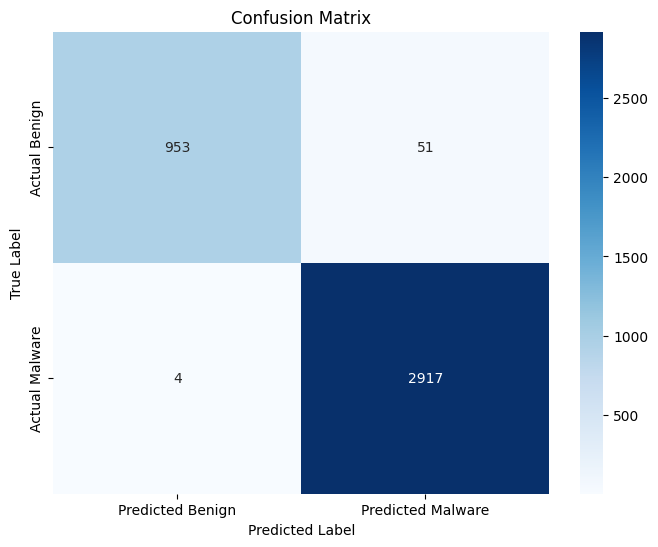

In [100]:
# prompt: generate confusion matrix for above

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the saved black box model
with open('blackBox_file.pkl', 'rb') as file:
    blackBox = pickle.load(file)

# Predict on the test data
X_test = np.concatenate((test_malware, test_benign), axis=0)
y_test = ([1] * test_malware.shape[0]) + ([0] * test_benign.shape[0])
y_pred = blackBox.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Benign', 'Predicted Malware'],
            yticklabels=['Actual Benign', 'Actual Malware'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [101]:
# Cell 5: Build the generator model using a feed-forward network.
def Generator(input_shape=(num_features,), noise_shape=(noise_dim,)):
    input_data = Input(shape=input_shape)
    noise = Input(shape=noise_shape)
    x = Concatenate(axis=1)([input_data, noise])

    x = Dense(units=x.shape[1])(x)
    x = Activation('relu')(x)

    x = Dense(units=128)(x)
    x = Activation('relu')(x)

    x = Dense(units=input_data.shape[1])(x)
    output = Activation('sigmoid')(x)

    model = Model([input_data, noise], output)
    return model

generator = Generator()
generator.summary()


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_20            │ (None, 77)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_21            │ (None, 77)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_4             │ (None, 154)            │              0 │ input_layer_20[0][0],  │
│ (Concatenate)             │                        │                │ input_layer_21[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_28 (Dense)          │ (None, 154)            │         23,870 │ concatenate_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_28             │ (None, 154)            │              0 │ dense_28[0][0]         │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_29 (Dense)          │ (None, 128)            │         19,840 │ activation_28[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_29             │ (None, 128)            │              0 │ dense_29[0][0]         │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_30 (Dense)          │ (None, 77)             │          9,933 │ activation_29[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_30             │ (None, 77)             │              0 │ dense_30[0][0]         │
│ (Activation)              │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 53,643 (209.54 KB)

 Trainable params: 53,643 (209.54 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
# Cell 6: Build the substitute detector model.
def SubstituteDetector(input_shape=(num_features,)):
    input_data = Input(shape=input_shape)
    x = Dense(units=input_shape[0])(input_data)
    x = Activation('sigmoid')(x)

    x = Dense(units=256)(x)
    x = Activation('sigmoid')(x)

    x = Dense(units=32)(x)
    x = Activation('sigmoid')(x)

    x = Dense(units=1)(x)
    output = Activation('sigmoid')(x)

    model = Model(input_data, output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

substituteDetector = SubstituteDetector()
substituteDetector.summary()


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)          │ (None, 77)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 77)                  │           6,006 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_31 (Activation)           │ (None, 77)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 256)                 │          19,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_32 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_33 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_34 (Activation)           │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,231 (133.71 KB)

 Trainable params: 34,231 (133.71 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
# Cell 7: Build the Mal-GAN model by combining the generator and substitute detector.
def MalGAN(generator, substituteDetector, input_shape=(num_features,), noise_shape=(noise_dim,)):
    # Freeze the substitute detector layers so that only the generator is trained within Mal-GAN.
    for layer in substituteDetector.layers:
        layer.trainable = False

    input_data = Input(shape=input_shape)
    noise = Input(shape=noise_shape)

    gen_output = generator([input_data, noise])
    detector_output = substituteDetector(gen_output)

    model = Model([input_data, noise], [detector_output, gen_output])
    model.compile(optimizer='adam', loss=['binary_crossentropy', 'mae'], loss_weights=[1, 100])
    return model

malGAN = MalGAN(generator, substituteDetector)
malGAN.summary()


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_23            │ (None, 77)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_24            │ (None, 77)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_12             │ (None, 77)             │         53,643 │ input_layer_23[0][0],  │
│ (Functional)              │                        │                │ input_layer_24[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_13             │ (None, 1)              │         34,231 │ functional_12[0][0]    │
│ (Functional)              │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 87,874 (343.26 KB)

 Trainable params: 53,643 (209.54 KB)

 Non-trainable params: 34,231 (133.71 KB)

In [104]:
# Cell 8: Set up batch processing and train the Mal-GAN model.
# Reload the black box model from the pickle file
with open(blackBox_file, 'rb') as file:
    blackBox = pickle.load(file)

batch_size = 64

# Reshape MalGAN training data into batches
num_malware_batches = MalGAN_malware.shape[0] // batch_size
num_benign_batches = MalGAN_benign.shape[0] // batch_size

MalGAN_malware = MalGAN_malware[:num_malware_batches * batch_size].reshape((num_malware_batches, batch_size, MalGAN_malware.shape[1]))
MalGAN_benign = MalGAN_benign[:num_benign_batches * batch_size].reshape((num_benign_batches, batch_size, MalGAN_benign.shape[1]))

def get_noise(batch_size, noise_dim):
    return np.random.normal(0, 1, (batch_size, noise_dim))

def getLabeledData(generator, blackBox, malware_batch, benign_batch, noise_batch):
    # Generate synthetic malware samples using the generator
    X = generator.predict([malware_batch, noise_batch])
    samples = np.concatenate([benign_batch, X], axis=0)
    np.random.shuffle(samples)
    bb_predictions = blackBox.predict(samples)
    return samples, bb_predictions

def train(generator, blackBox, substituteDetector, malGAN, malware_batches, benign_batches, epochs=5, batch_size=batch_size, noise_dim=noise_dim):
    benign_batch_idx = 0
    num_benign_batches = benign_batches.shape[0]
    num_malware_batches = malware_batches.shape[0]

    for epoch in range(epochs):
        for malware_batch_idx in range(num_malware_batches):
            malware_batch = malware_batches[malware_batch_idx]
            benign_batch = benign_batches[benign_batch_idx]
            benign_batch_idx = (benign_batch_idx + 1) % num_benign_batches

            noise_batch = get_noise(malware_batch.shape[0], noise_dim)

            # Train substitute detector on generated labeled data
            bb_samples, bb_labels = getLabeledData(generator, blackBox, malware_batch, benign_batch, noise_batch)
            substituteDetector_loss = substituteDetector.train_on_batch(bb_samples, bb_labels)

            # Train the generator via Mal-GAN (using substitute detector feedback)
            sd_out = substituteDetector.predict(malware_batch)
            generator_loss = malGAN.train_on_batch([malware_batch, noise_batch], [sd_out, malware_batch])

        print(f"Epoch {epoch+1}/{epochs} - Substitute Detector Loss: {substituteDetector_loss} - Generator Loss: {generator_loss}")

# Run training
train(generator, blackBox, substituteDetector, malGAN, MalGAN_malware, MalGAN_benign, epochs=5)

# Save the trained models
generator.save('generator.h5')
substituteDetector.save('substituteDetector.h5')
malGAN.save('malGAN.h5')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━

Epoch 5/5 - Substitute Detector Loss: [array(0.7294811, dtype=float32), array(0.47352335, dtype=float32)] - Generator Loss: [array(1.059128e+10, dtype=float32), array(0.67421806, dtype=float32), array(1.0591291e+08, dtype=float32)]


In [105]:
# Cell 9: Create a test set that includes benign, original malware, and synthetic malware samples.
def getTestData(generator, malware, benign, noise_dim=noise_dim):
    noise = get_noise(malware.shape[0], noise_dim)
    synthetic = generator.predict([malware, noise])
    # Combine benign, original malware, and synthetic malware samples
    test_data = np.concatenate((np.concatenate((benign, malware), axis=0), synthetic), axis=0)
    test_labels = []
    test_labels.extend([0] * benign.shape[0])
    test_labels.extend([1] * malware.shape[0])
    test_labels.extend([1] * synthetic.shape[0])
    test_labels = np.array(test_labels)

    shuffle_idx = np.arange(test_data.shape[0])
    np.random.shuffle(shuffle_idx)
    test_data = test_data[shuffle_idx]
    test_labels = test_labels[shuffle_idx]

    return test_data, test_labels

test_samples, test_labels = getTestData(generator, test_malware, test_benign)
print("Testing Black Box on combined dataset:")
print(classification_report(blackBox.predict(test_samples), test_labels))


92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Testing Black Box on combined dataset:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       957
           1       1.00      0.99      1.00      5889

    accuracy                           0.99      6846
   macro avg       0.97      0.99      0.98      6846
weighted avg       0.99      0.99      0.99      6846



In [106]:
important_features

['Malware',
 'MajorSubsystemVersion',
 'Subsystem',
 'SectionMaxChar',
 'Magic',
 'Machine',
 'SizeOfOptionalHeader',
 'SizeOfStackReserve',
 'TimeDateStamp',
 'SuspiciousImportFunctions',
 'SectionAlignment',
 'DllCharacteristics',
 'e_maxalloc',
 'FileAlignment',
 'MinorLinkerVersion',
 'CheckSum',
 'MajorLinkerVersion',
 'DirectoryEntryImport',
 'Characteristics',
 'NumberOfSections',
 'SectionsLength',
 'ImageBase',
 'DirectoryEntryExport',
 'SizeOfHeapReserve',
 'e_lfanew',
 'SectionMinRawsize',
 'SectionMinVirtualsize',
 'SuspiciousNameSection',
 'SectionMinEntropy',
 'SectionMaxPointerData',
 'e_oeminfo',
 'AddressOfEntryPoint',
 'e_oemid',
 'NumberOfSymbols',
 'e_ip',
 'e_ovno',
 'e_cs',
 'e_lfarlc',
 'SizeOfHeaders',
 'PointerToSymbolTable',
 'e_cp',
 'e_cblp',
 'e_sp',
 'MinorImageVersion',
 'e_crlc',
 'e_minalloc',
 'e_cparhdr',
 'SizeOfHeapCommit',
 'MajorImageVersion',
 'DirectoryEntryImportSize',
 'SizeOfStackCommit',
 'e_csum',
 'ImageDirectoryEntryResource',
 'SizeOfIni

In [107]:
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Also save the column order if needed
column_order = list(filtered_df.columns)
with open('column_order.pkl', 'wb') as f:
    pickle.dump(column_order, f)